In [2]:
import pandas
import glob
import os
import pylab
import numpy
import subprocess
from astropy.io import ascii
from astropy.time import Time
from scipy.stats import sigmaclip


Here I define Stuart's trender.py wrappter to use it in Jupter Notebook

In [3]:
def trender(start, dur, item):
    command = ['/gpfs/slac/lsst/fs1/g/data/youtsumi/tmp/anaconda3/bin/python3.7 /gpfs/slac/lsst/fs2/u1/devel/marshall/mutils/bin/trender.py',
         '--force --start {}UTC --dur {} --text -- {}'.format(start.isot,dur,item) ]
    trend = subprocess.run( " ".join(command), stdout=subprocess.PIPE,shell=True)
    return ascii.read(trend.stdout.decode('utf-8'),
               names=[
                   'time (ms)',
                   'value',
                   'unit',
                   'channel CCS path',
                   'iso-8601 Date'
               ])

Here I define a function to make a plot of gain change

In [9]:
def gainchange( path ):
    pickles = glob.glob(path)
    results = {}
    for apickle in pickles:
        results.update(
            {
                "_".join(os.path.basename(apickle).split("_")[:2])
                : pandas.read_pickle(apickle)
            }
        )

    fig, axs = pylab.subplots(4, 3, figsize=(9,12),facecolor='w')
    axes = axs.flatten()
    
    for j, asensor in enumerate(
            [
                "S20", "S21", "S22",
                "S10", "S11", "S12",
                "S00", "S01", "S02"
            ]
    ):
        ax = axes[j]
        norm = numpy.median([ results["R22_S20"]["amp{:02d}".format(k)] for k in range(1,17) ],axis=0)
        norm /= norm.mean()
#        print(norm)
        for i in range( 1,17 ):        
            thesensorname="R22_{}".format(asensor)
            mjd = results[thesensorname]["mjd"]            
            y = results[thesensorname]["amp{:02d}".format(i)]/norm
            ax.set_title(thesensorname)
            ax.set_ylabel("Relative Gain scaled by R22_S20")
            ax.plot(mjd,y/y[0],".")
        dy = max(0.0003, (y/y[0]).std()*5)
        ax.set_ylim(1-dy,1+dy)
            
    dt1 = Time(mjd.min(),format="mjd")
    dt2 = Time(mjd.max(),format="mjd")
    m = "{:.0f}m".format((dt2.datetime-dt1.datetime).total_seconds()/60)

    for i, name in enumerate([
#        "ts8-bench/Lamp/lampcurrent",
#        "ir2-airwatch/MAIN_NW/temp/value"
        ]):
        trend = trender(dt1,m, name)
        ax = axes[i+j+1]
        ax.plot(
            Time(trend["time (ms)"]/1000,format="unix").mjd,
            trend["value"],
            label = name
        )
        ax.set_title(name)

    fig.suptitle(os.path.basename(path))
    fig.tight_layout()

#gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210525baseline_flat_signal_sequence.pickle")

## gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210921flat100_*.pickle")


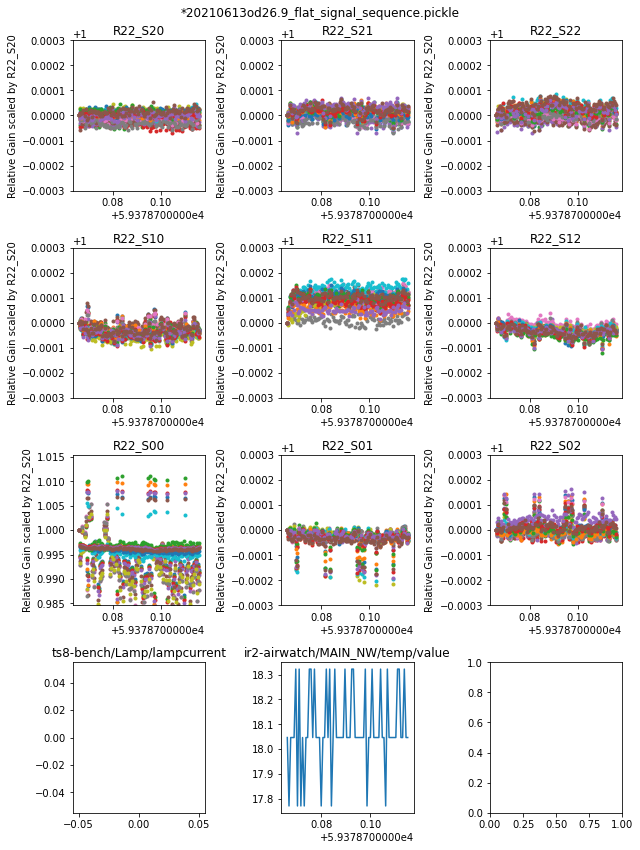

In [8]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210613od26.9_flat_signal_sequence.pickle")


In [ ]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210702JitterOn_flat_signal_sequence.pickle")
cd

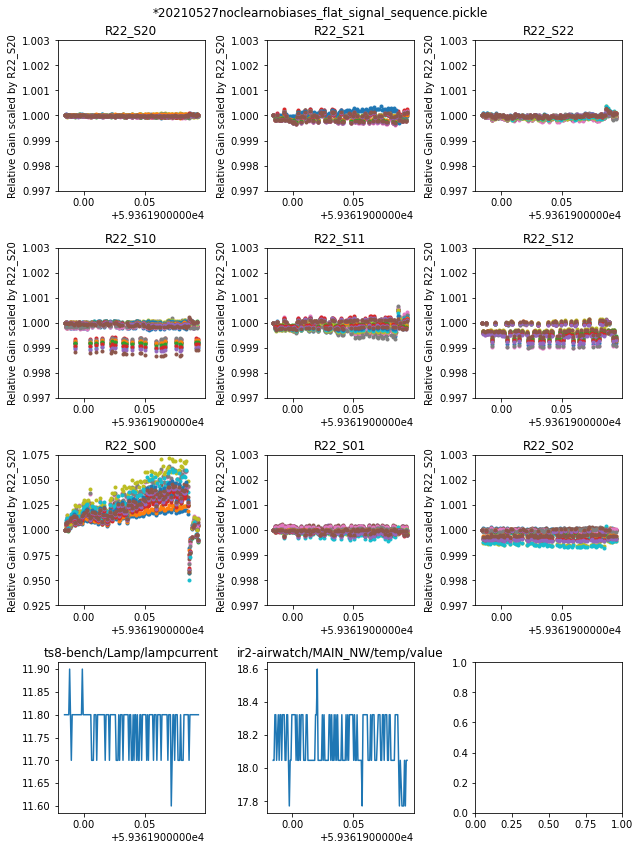

In [76]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210527noclearnobiases_flat_signal_sequence.pickle")

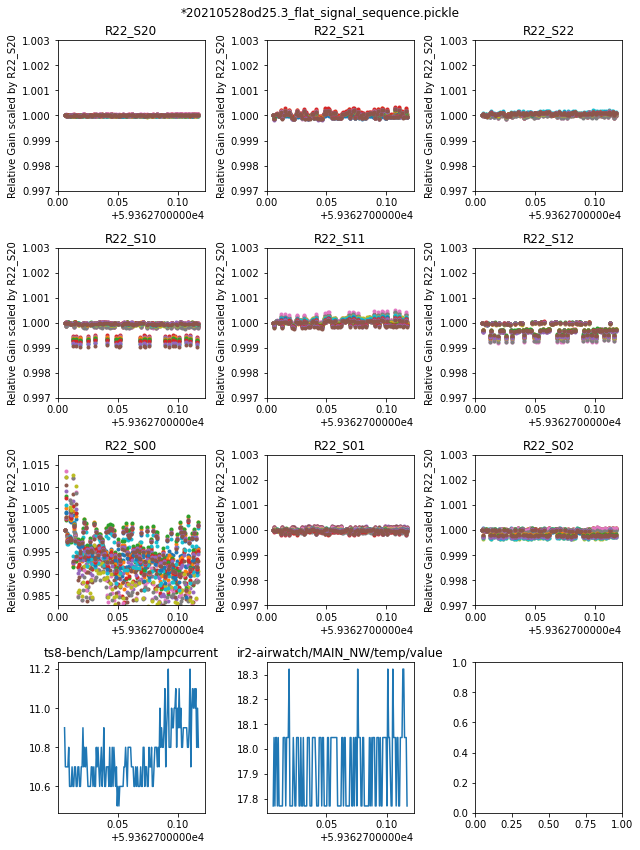

In [77]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210528od25.3_flat_signal_sequence.pickle")

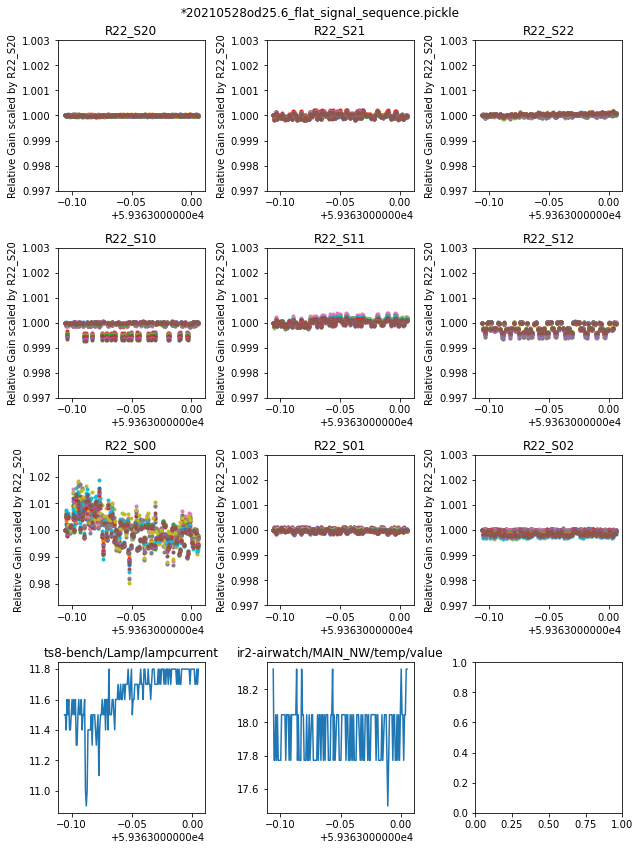

In [78]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210528od25.6_flat_signal_sequence.pickle")

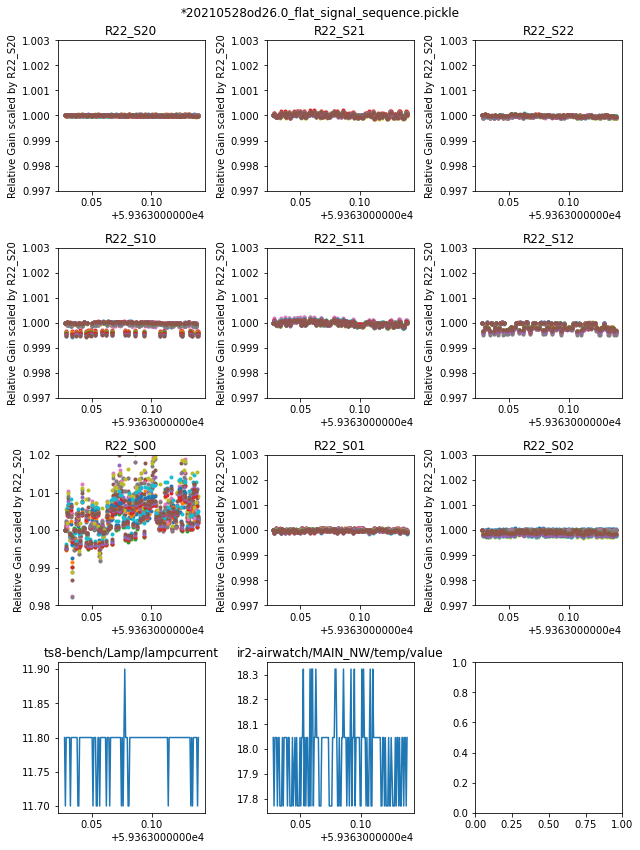

In [79]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210528od26.0_flat_signal_sequence.pickle")

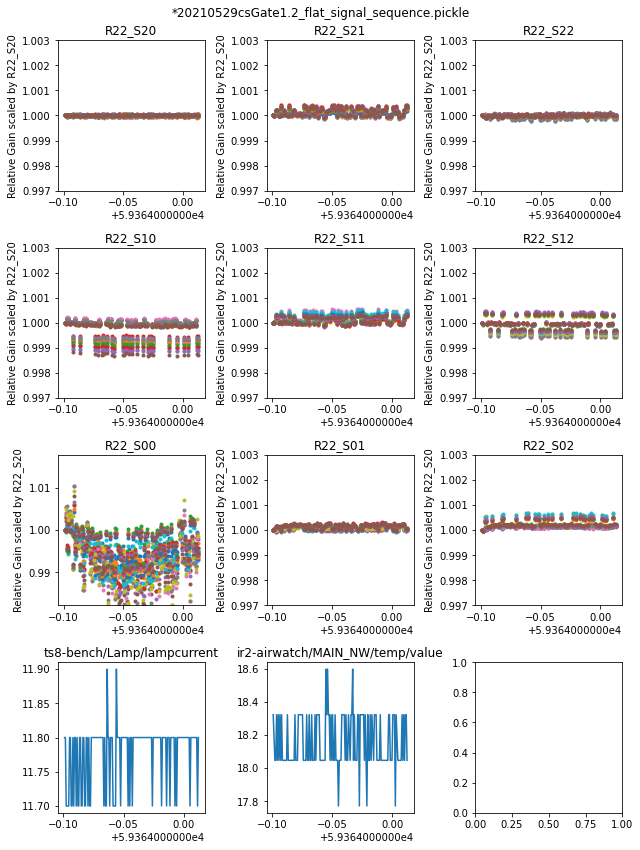

In [80]:
gainchange("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*20210529csGate1.2_flat_signal_sequence.pickle")

Photodiode trending

nan nan


<ipython-input-3-d5c21abbcb72>:14: RuntimeWarning: Mean of empty slice.
  pylab.axhline(Y.mean())
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2021_20/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.6.0-ext/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-3-d5c21abbcb72>:15: RuntimeWarning: Mean of empty slice.
  pylab.axhspan(Y.mean()-Y.std(),Y.mean()+Y.std(),alpha=0.3)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2021_20/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.6.0-ext/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2021_20/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.6.0-ext/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrme

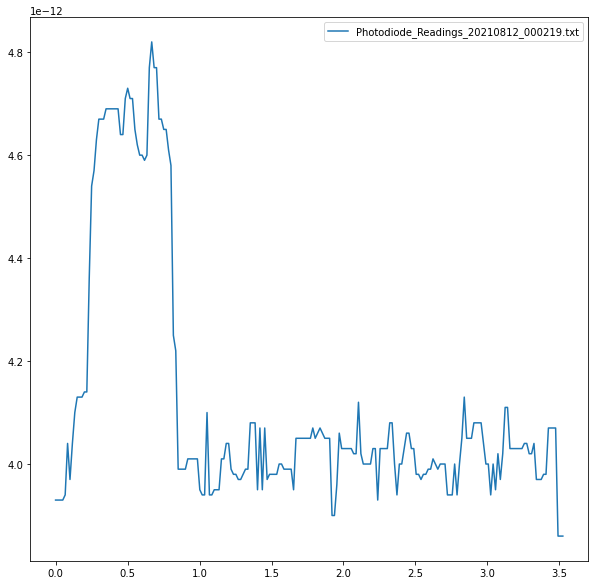

In [3]:
fig = pylab.figure(figsize=(10,10),facecolor="w")

for apath in [
#    "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210508/TS_C_20210508_000108/Photodiode_Readings_20210508_000108.txt",
#    "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210525baseline2/TS_C_20210525_000226/Photodiode_Readings_20210525_000226.txt",
#    "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210525baseline2/TS_C_20210525_000227/Photodiode_Readings_20210525_000227.txt",
#    "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210527/TS_C_20210527_000016/Photodiode_Readings_20210527_000016.txt"
    "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210812/TS_C_20210812_000219/Photodiode_Readings_20210812_000219.txt"
    ]:
    f=numpy.loadtxt(apath)
    x, y = f.T
    pylab.plot(x,y,label=os.path.basename(apath))
    Y = y[numpy.where( y < -1.5e-8 )]
    pylab.axhline(Y.mean())
    pylab.axhspan(Y.mean()-Y.std(),Y.mean()+Y.std(),alpha=0.3)
    print(Y.mean(), Y.std())
pylab.legend()

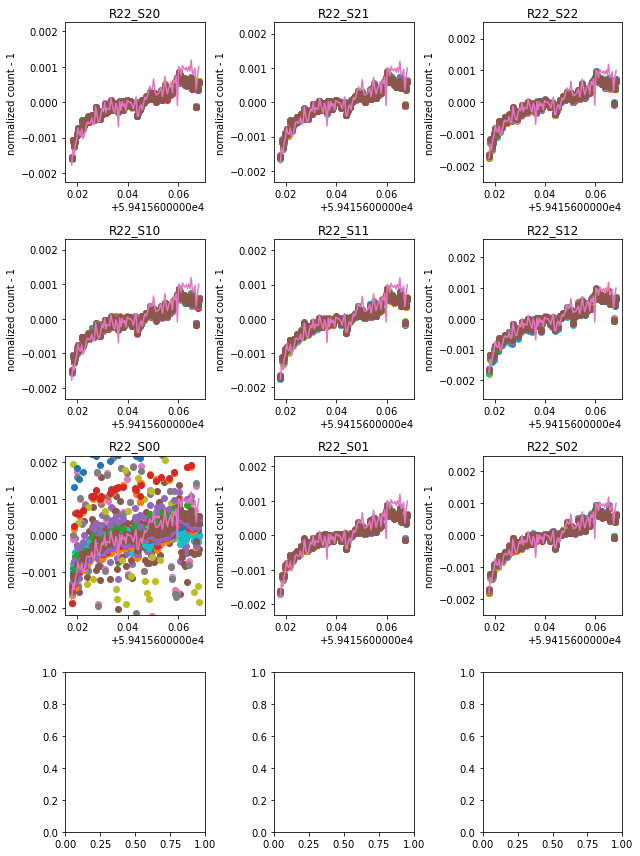

In [2]:
def main(path):
    pickles = glob.glob(path)

    results = {}
    for apickle in pickles:
        results.update(
            {
                "_".join(os.path.basename(apickle).split("_")[:2])
                : pandas.read_pickle(apickle)
            }
        )

    #fig = pylab.figure()
    fig, axs = pylab.subplots(4, 3, figsize=(9,12),facecolor='w')
    axes = axs.flatten()
    for j, asensor in enumerate(
            [
                "S20", "S21", "S22",
                "S10", "S11", "S12",
                "S00", "S01", "S02"
            ]
    ):
        ax = axes[j]
        for i in range( 1,17 ):
            thesensorname="R22_{}".format(asensor)
            y = results[thesensorname]["amp{:02d}".format(i)]
            y = y/numpy.median(y)-1
            ax.set_title(thesensorname)
            ax.set_ylabel("normalized count - 1")
            c, low, upp = sigmaclip(y)
            s = c.std()
            ax.set_ylim(-5*s,5*s)
            ax.plot(results[thesensorname]["mjd"],y,"o")
        y = results[thesensorname]["flux"]
        y = y/numpy.median(y)-1        
        mjd = results[thesensorname]["mjd"]
        ax.plot(mjd,y)


    dt1 = Time(mjd.min(),format="mjd")
    dt2 = Time(mjd.max(),format="mjd")
    m = "{:.0f}m".format((dt2.datetime-dt1.datetime).total_seconds()/60)

    try:
        for i, name in enumerate([
    #        "ts8-bench/Lamp/lampcurrent",
           "ir2-airwatch/MAIN_NW/temp/value"
            ]):
            trend = trender(dt1,m, name)
            ax = axes[i+j+1]
            ax.plot(
                Time(trend["time (ms)"]/1000,format="unix").mjd,
                trend["value"],
                label = name
            )
            ax.set_title(name)
    except:
        pass
    fig.tight_layout()

main("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210720ground*.pickle")

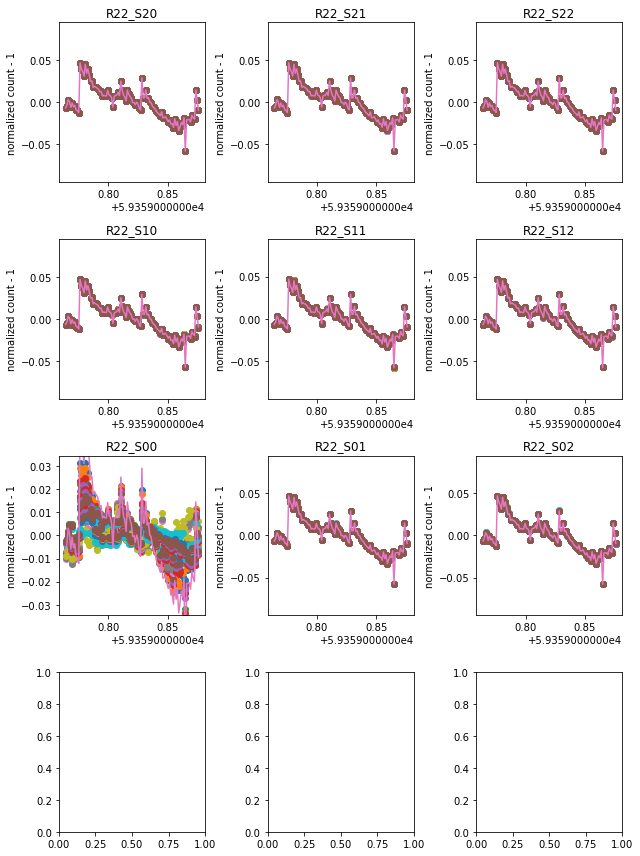

In [3]:
main("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210525baseline_*.pickle")

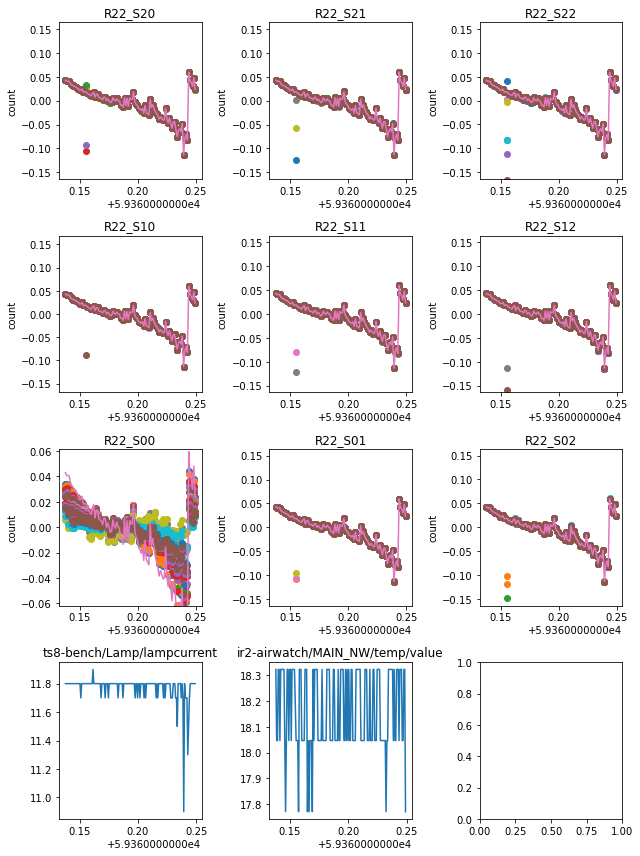

In [23]:
main("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210525baseline2_*.pickle")

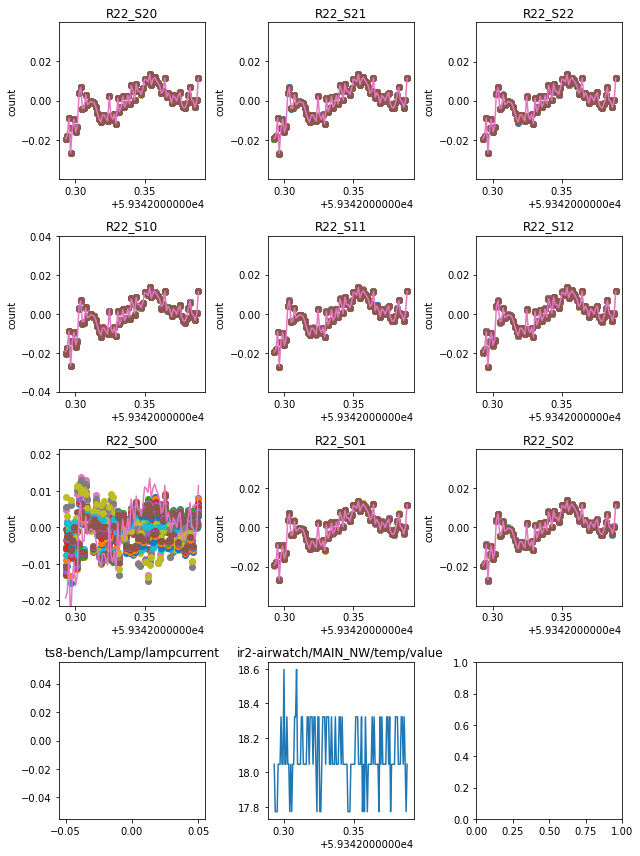

In [24]:
main("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210508_*.pickle")

FileNotFoundError: [Errno 2] No such file or directory: ''

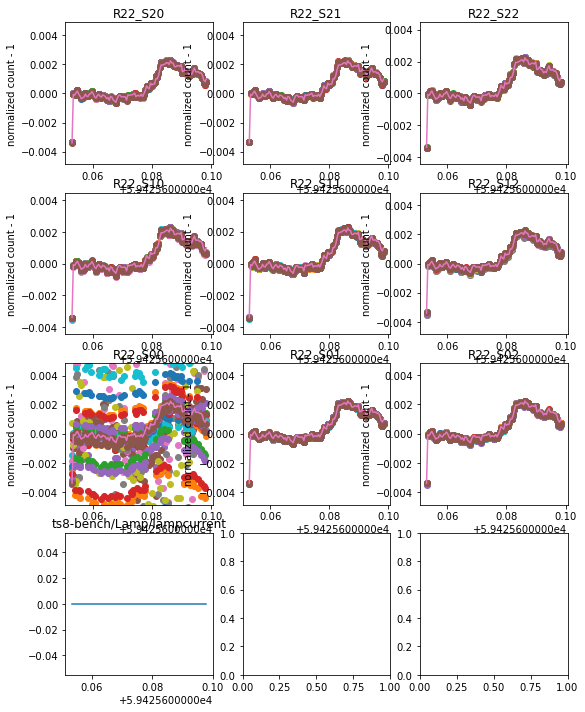

In [5]:
main("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210730median2rank_*.pickle")

In [5]:
import scipy.signal as signal
from astropy.table import Table
from astropy.io import fits
from scipy import signal
import os
import seaborn

def colorflux(path, fitspathpattern = None, skip=0):
    pickles = glob.glob(path)

    results = {}
    for apickle in pickles:
        results.update(
            {
                "_".join(os.path.basename(apickle).split("_")[:2])
                : pandas.read_pickle(apickle)
            }
        )

    #fig = pylab.figure()
    figa, axs = pylab.subplots(3, 3, figsize=(12,12),facecolor='w')
    axes = axs.flatten()
    figb, bxs = pylab.subplots(3, 3, figsize=(12,12),facecolor='w')
    bxes = bxs.flatten()
    figc, cxs = pylab.subplots(2, 1, figsize=(12,12),facecolor='w')
    cxes = cxs.flatten() #cxs.flatten()
    nd = 2
    
    if fitspathpattern is not None:
        nd += 2
    figd, dxs = pylab.subplots(nd, 1, figsize=(12,12),facecolor='w')
    dxes = dxs.flatten() #cxs.flatten()
    
    figd, exs = pylab.subplots(2, 1, figsize=(12,12),facecolor='w')
    exes = exs.flatten() #cxs.flatten()

    
    for j, asensor in enumerate(
            [
                "S20", "S21", "S22",
                "S10", "S11", "S12",
                "S00", "S01", "S02"
            ]
    ):
        ax = axes[j]
        bx = bxes[j]
#        cx = cxes[j]
        for i in range( 1,17 ):
            thesensorname="R22_{}".format(asensor)
            y = results[thesensorname][skip:]["amp{:02d}".format(i)]
            x = results[thesensorname][skip:]["flux"]
            t = results[thesensorname][skip:]["mjd"]
            ax.set_title(thesensorname)
            ax.set_ylabel("fractional change in CCD/PD ratio")
            ax.set_xlabel("fractional change in PD measurements")
            c, low, upp = sigmaclip(y)
            s = c.std()
#            ax.set_ylim(-5*s,5*s)
            Y = y/x
            Y = Y/Y.mean()-1
            X = x/x.mean()-1            

            fit = numpy.polyfit( X, Y, 4 )
            ax.plot(X,Y,".")
            
            xp = numpy.arange(X.min(),X.max(),(X.max()-X.min())/100)
            
#            ax.plot( X, numpy.poly1d(fit)(X), "-")
            ax.plot( xp, numpy.poly1d(fit)(xp), "-")
            
            bx.plot(t, Y+0.001/2,",")
            bx.plot(t, Y-numpy.poly1d(fit)(X),".", label="{:.1e}".format(numpy.std(Y-numpy.poly1d(fit)(X))) )
            bx.plot(t, numpy.poly1d(fit)(X)+2*0.001/2,",", label="predicted")
            
            bx.set_ylim(-1e-3,2e-3)
#            bx.set_ylim(-3.5e-3,3.5e-3)
#            ax.set_ylim(-1e-3,1.5e-3)
#            ax.set_xlim(-4e-3,3e-3)
#            bx.legend()
            bx.set_xlabel("MJD")
            bx.set_ylabel("Corrected fractional change in CCD/PD ratio")

    
    dx = dxes[0]
    dx.plot(t, Y+0.001/2,".", label="before correction{:.1e}".format(numpy.std(Y)))
    dx.plot(t, Y-numpy.poly1d(fit)(X),".", label="after correction {:.1e}".format(numpy.std(Y-numpy.poly1d(fit)(X))) )
    dx.plot(t, numpy.poly1d(fit)(X)+2*0.001/2,".", label="amount of correction")
    dx.set_ylabel("Fractional difference")    
    dx.set_ylim(-1e-3,2e-3)
    dx.legend()
    dx = dxes[1]    
    dx.plot(t, X,".", label="PD")
    dx.plot(t, y/y.mean()-1,".", label="CCD")
    dx.legend()
    dx.set_ylabel("Fractional difference")

    if fitspathpattern is not None:
        fitsfiles = (glob.glob(fitspathpattern))[::]
        additionaldata = Table([
            {
                key: fits.open(afitsfile)[aplane].header[key]
                for aplane, key in [
                (0,"MJD-OBS"),
                (0,"EXPTIME"),
                (0,"DARKTIME"),
                (-2, "TEMP1"),
                (-2, "TEMP5"),
                (-2, "ATEMPU"),
                (-2, "ATEMPL"),
                (-2, "CCDTEMP"),
                (-2, "BSSVBS")
            ]
            } for afitsfile in fitsfiles
        ])
        additionaldata.sort("MJD-OBS")
        for colname in additionaldata.colnames:
            if colname == "MJD-OBS":
                continue
            if colname in ["EXPTIME", "DARKTIME"]:
                dx = dxes[2]
                
                cond = additionaldata["EXPTIME"]>additionaldata["EXPTIME"].max()*0.9
                mean = additionaldata[colname][cond].mean()
                
                time = additionaldata["MJD-OBS"][cond]
                frac = ((additionaldata[colname]-mean)/mean)[cond]
                idx = numpy.argsort(time)
                time = time[idx]
                frac = frac[idx]
                dx.scatter(time[::2],frac[::2],
                           label=colname)
                dx.scatter(time[1::2],frac[1::2],
                           label=colname)
                
                dx.legend()
                dx.set_ylabel("Delta time/mean")
                
            else:
                dx = dxes[3]                
                dx.scatter(additionaldata["MJD-OBS"],
                           (additionaldata[colname]-additionaldata[colname][cond].mean()),
                           label=colname)
#                print(additionaldata)
                dx.legend()
                dx.set_ylabel("Delta Temp from mean")

        print(len(Y), len(additionaldata["BSSVBS"][cond][skip:]),-len(Y))
        ex=exes[0]
        ex.scatter( additionaldata["BSSVBS"][cond][-len(Y):], Y, label="CCD/PD" )
#        seaborn.violinplot(x=additionaldata["BSSVBS"][cond][-len(Y):], y=Y, label="CCD/PD", ax=ex, color="red",alpha=0.2)
        ex.scatter( additionaldata["BSSVBS"][cond][-len(Y):]*(1.0001), X, label="PD" )
#        seaborn.violinplot(x=additionaldata["BSSVBS"][cond][-len(Y):]*(1.0001), y=X, label="PD", ax=ex, color="blue",alpha=0.2)
        ex.set_xlabel("BSSVBS")
        ex.set_ylabel("relative change")
        ex.legend()        

        ex=exes[1]
        correlation = signal.correlate(additionaldata["BSSVBS"][cond][-len(Y):], X, mode="full")
        lags = signal.correlation_lags(X.size, X.size, mode="full")
        ex.plot( lags, correlation/correlation.std(), label="BSS $\otimes$ PD" )
        correlation = signal.correlate(Y, X, mode="full")        
        ex.plot( lags, correlation/correlation.std(), label="PD $\otimes$ CCD/PD" )
        correlation = signal.correlate(additionaldata["BSSVBS"][cond][-len(Y):], Y, mode="full")        
        ex.plot( lags, correlation/correlation.std(), label="BSS $\otimes$ CCD/PD" )        
        lag = lags[numpy.argmax(correlation)]
        ex.set_xlabel("Lag in num of images")
        ex.set_ylabel("Cross corerlation")        
        ex.grid()
        print(lag)
        ex.legend()
    
    fit = numpy.polyfit( t, x, 3 )
#        f = (t.max() - t.min())*numpy.linspace(0.001, 1, 100)
#        f = 10**numpy.linspace(0.01, 1000, 100)
    f = 10**numpy.arange(1.5, 3, 0.01)
    
    dx = x-numpy.poly1d(fit)(t)
    
#    dx = numpy.sin( t*2*2*numpy.pi )
    print(t.max()-t.min())
    pgram = signal.lombscargle(t, dx, f, normalize=True)

    cxes[0].plot(t, dx, ".")
#    cxes[0].semilogx()    
    cxes[1].plot(2*numpy.pi/f*(t.max()-t.min()), pgram, "-", label=24*2*numpy.pi/f[numpy.argmax(pgram)]*(t.max()-t.min()))
    
    cxes[1].semilogx()
#        y = results[thesensorname]["flux"]
#        y = y/numpy.median(y)-1        
#        mjd = results[thesensorname]["mjd"]
#        ax.plot(mjd,y)

    pylab.suptitle(path)
    figc.legend()
    for fig in [ figa, figb, figc, figd ]:
        fig.tight_layout()


In [21]:
#colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210613od26.9_*.pickle")
#colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210720ground_*.pickle")
#colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210722iband_*.pickle")
#colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210729median_*.pickle")
#colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210730median2rank_*.pickle")
#colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210729iband_*.pickle")

102 102 -102
51
0.06398185156285763


/tmp/ipykernel_1530/162484988.py:1: RankWarning: Polyfit may be poorly conditioned
  colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210921flat100_*.pickle",


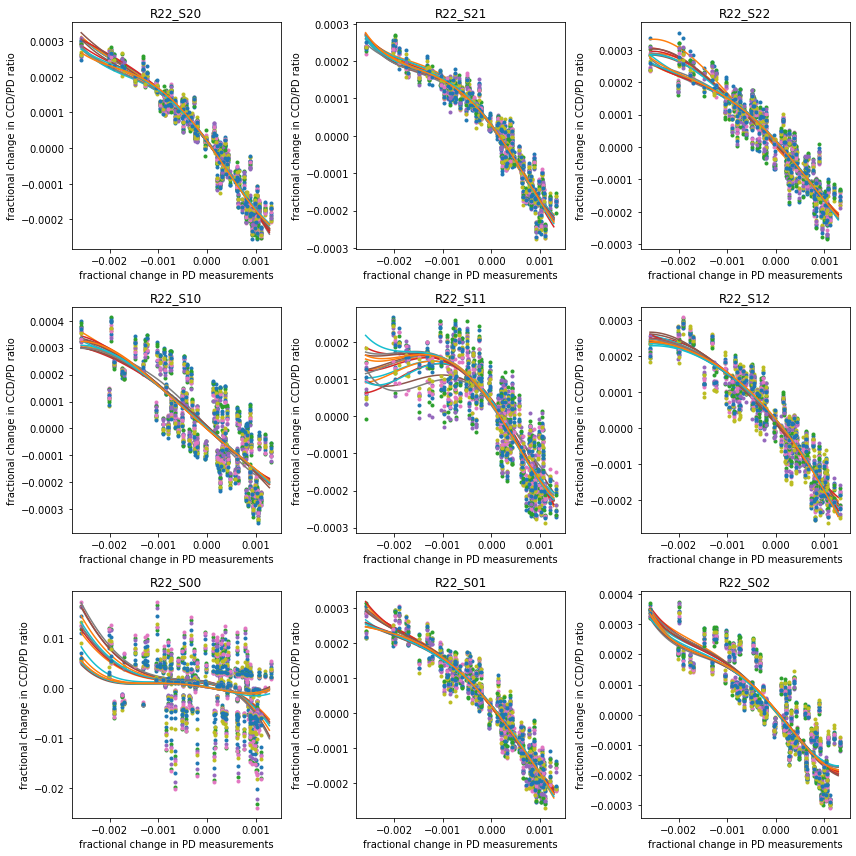

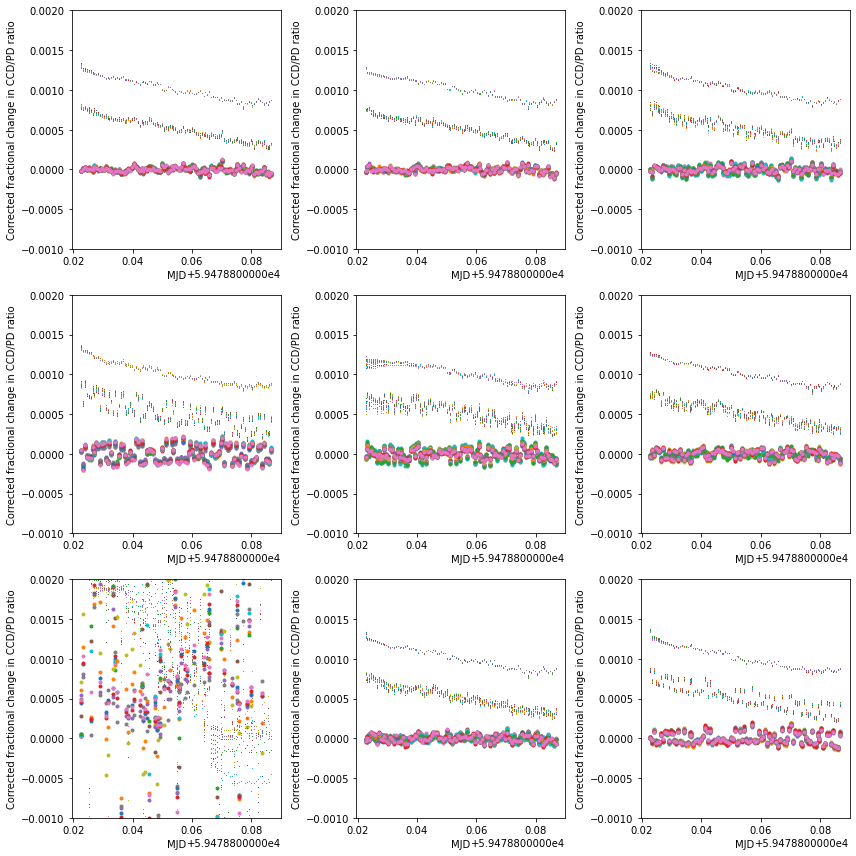

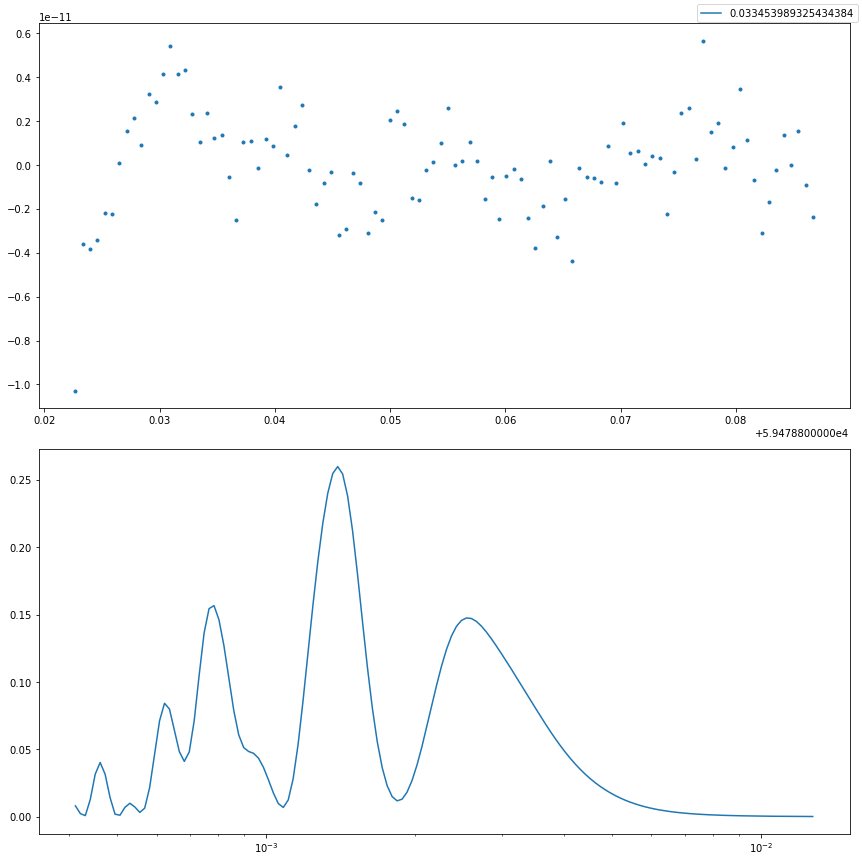

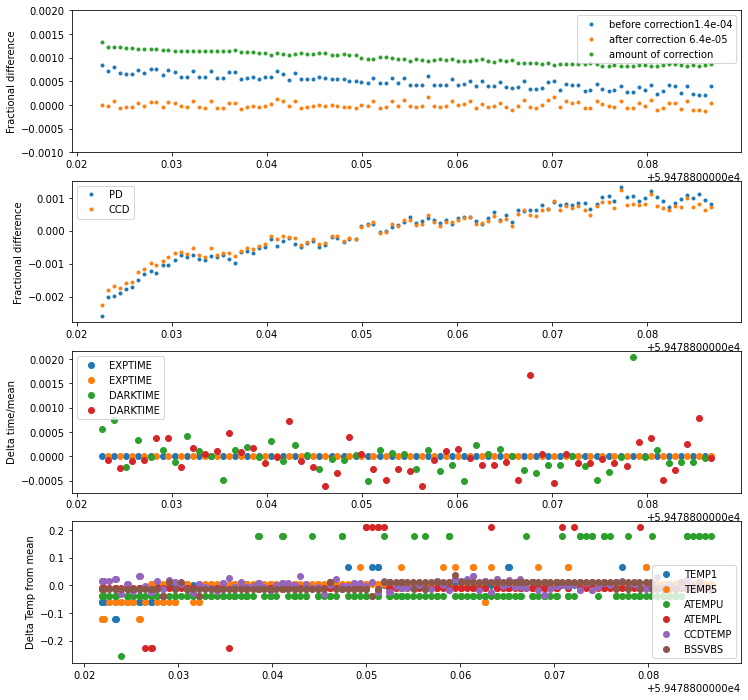

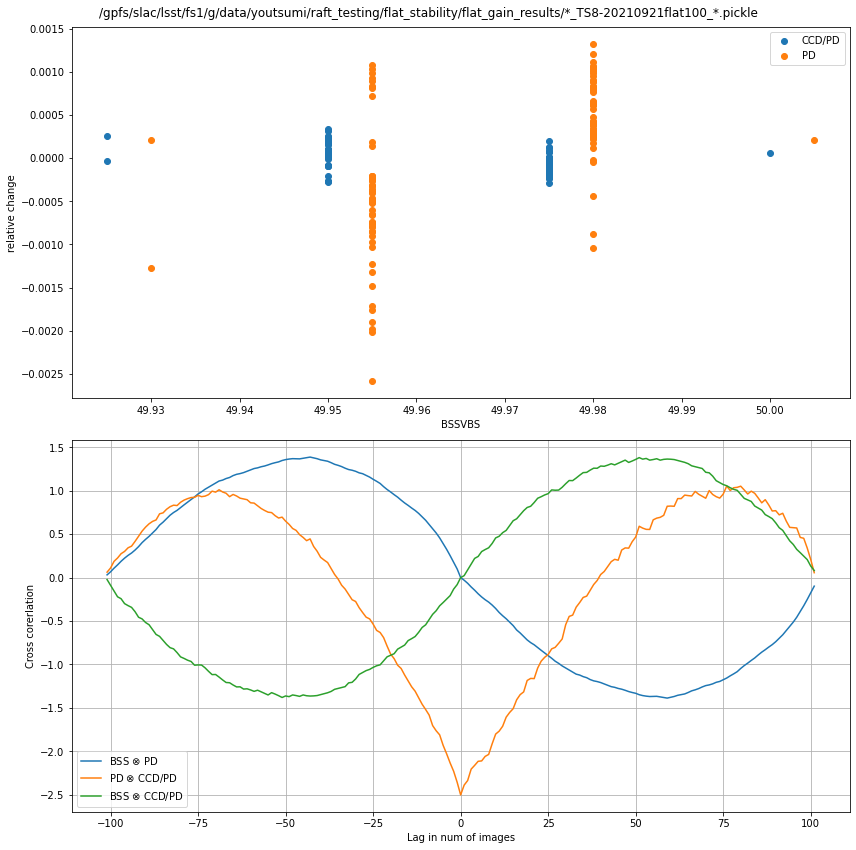

In [7]:
colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210921flat100_*.pickle",
         "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210921flat100/TS_C_*/TS_C_*_R22_S11.fits")

241 239 -241
-79
0.8600565744563937


<ipython-input-55-0a8ea5c0e97d>:1: RankWarning: Polyfit may be poorly conditioned
  colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210824long_*.pickle",skip=2,


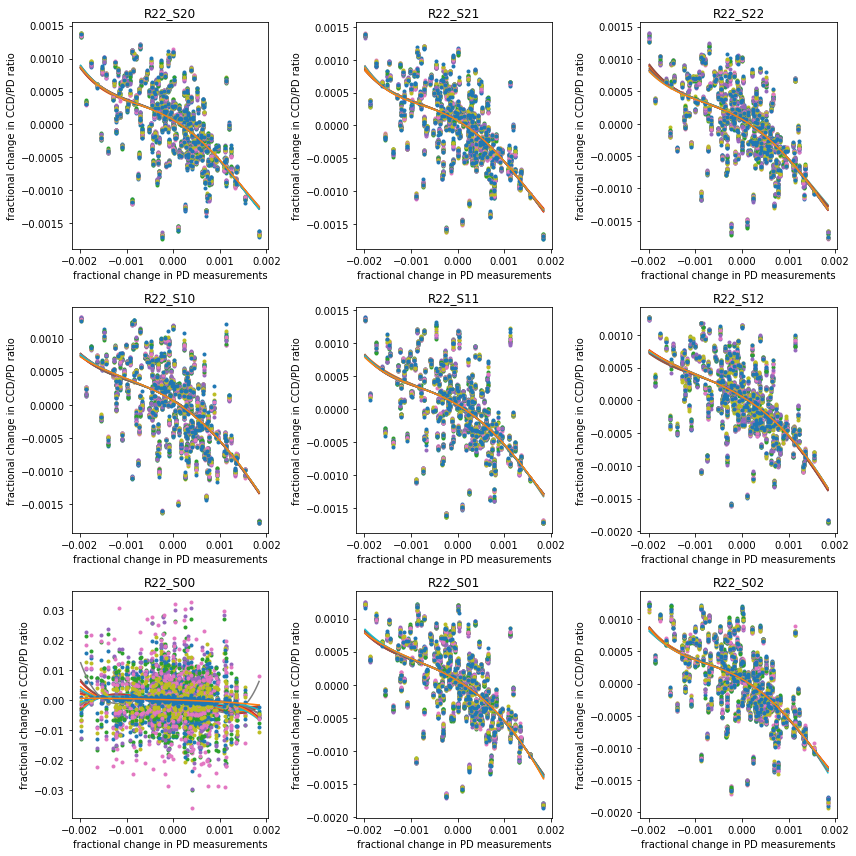

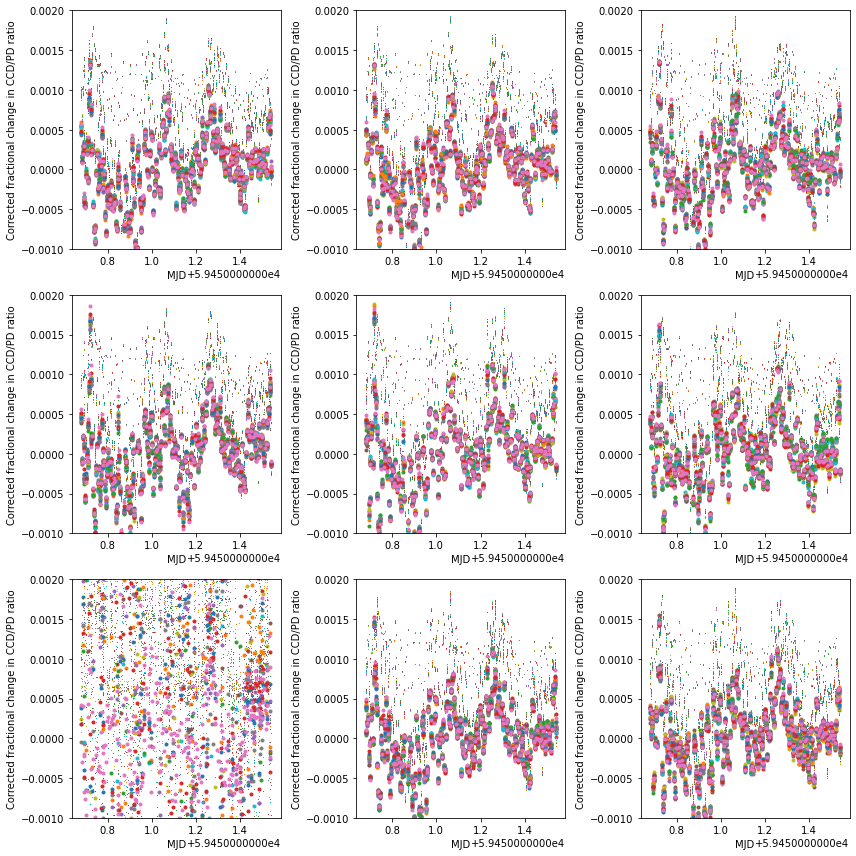

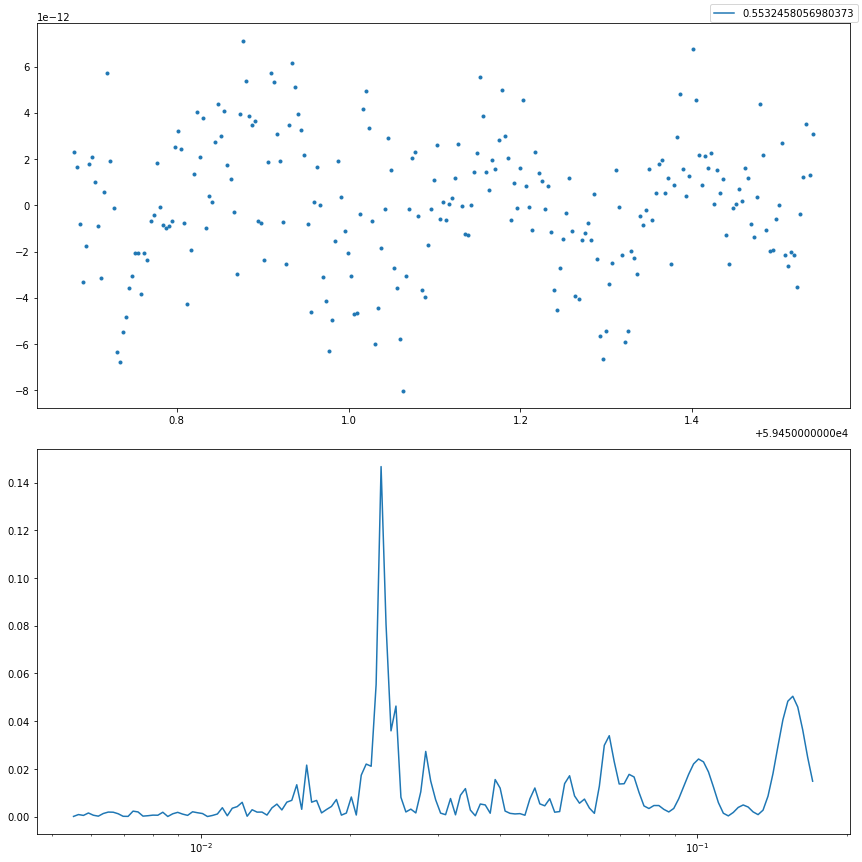

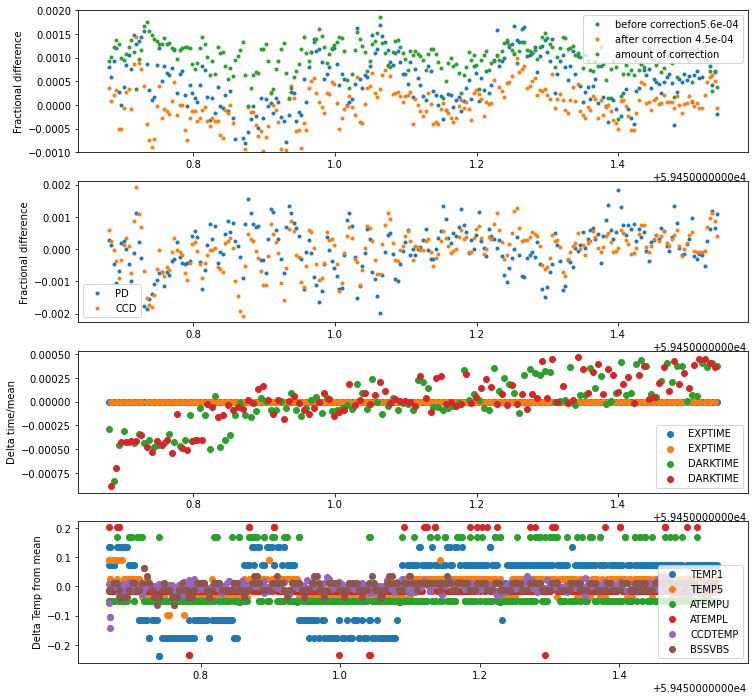

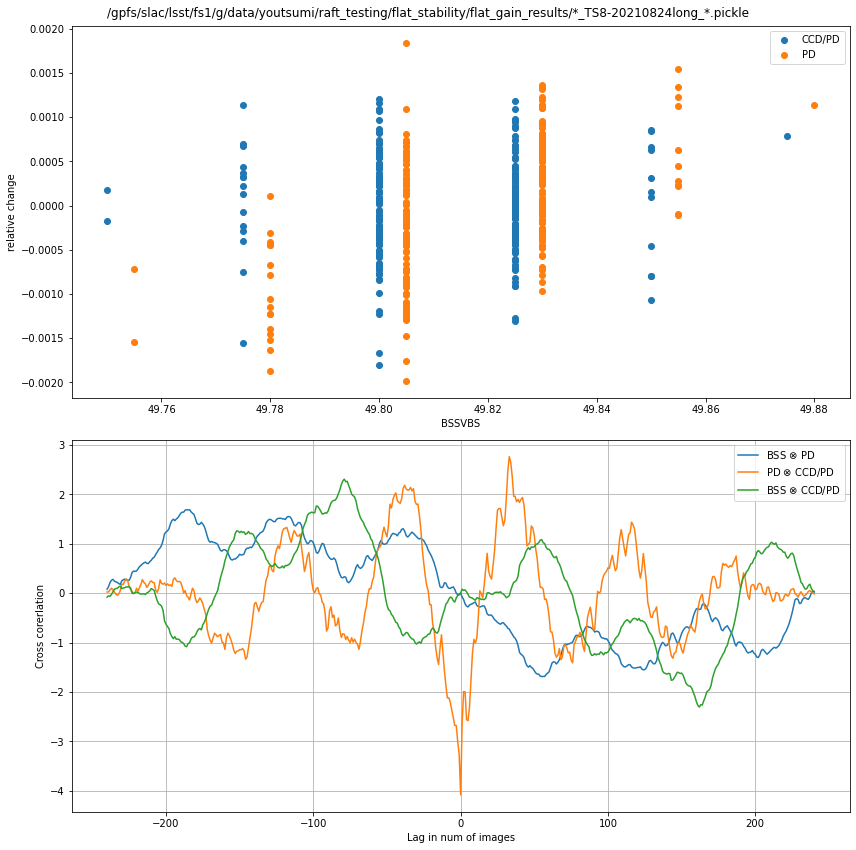

In [55]:
colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210824long_*.pickle",skip=2,
         fitspathpattern="/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210824long/TS_C_*/TS_C_*_R22_S11.fits")

No handles with labels found to put in legend.


101 101 -101
65
0.02652596076950431


<ipython-input-50-1fdda3c68e60>:1: RankWarning: Polyfit may be poorly conditioned
  colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210826_*.pickle",skip=1,


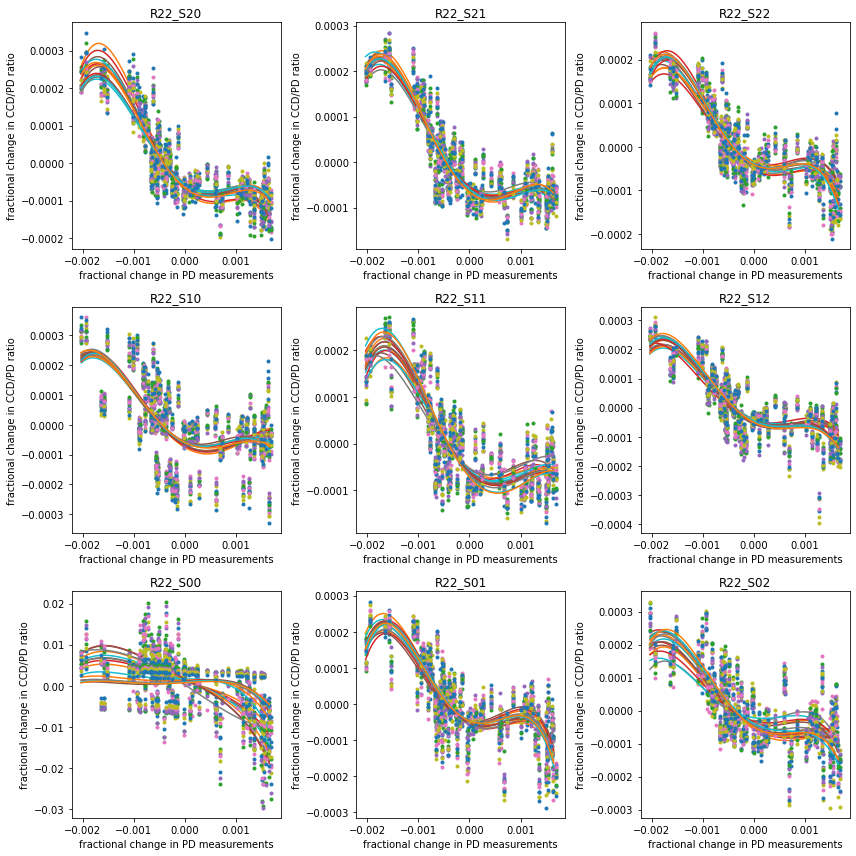

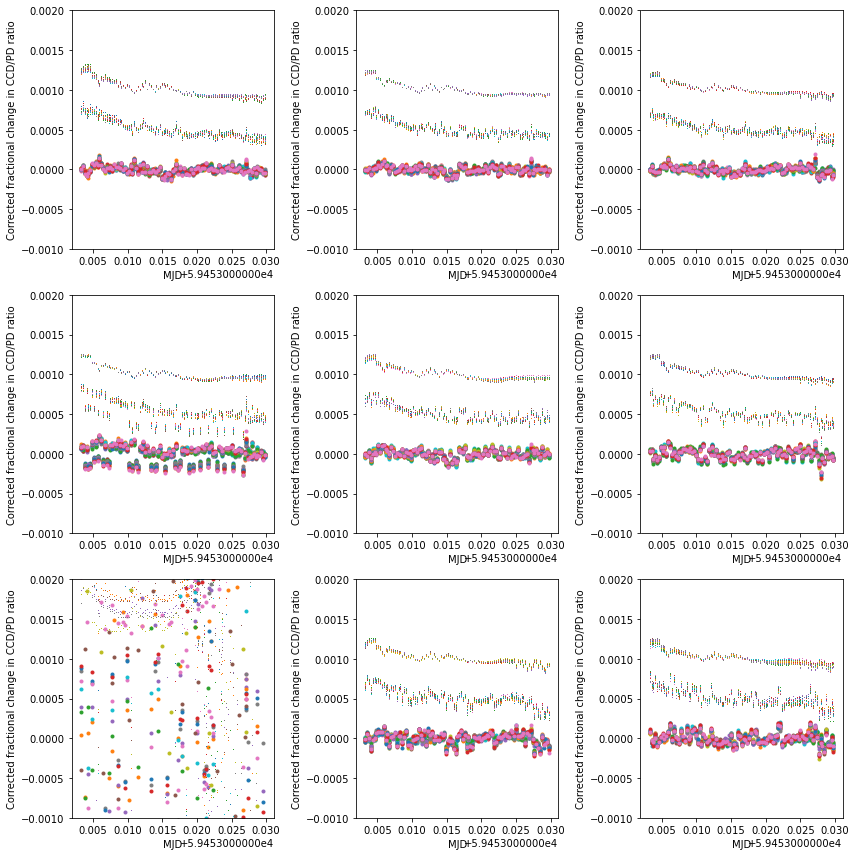

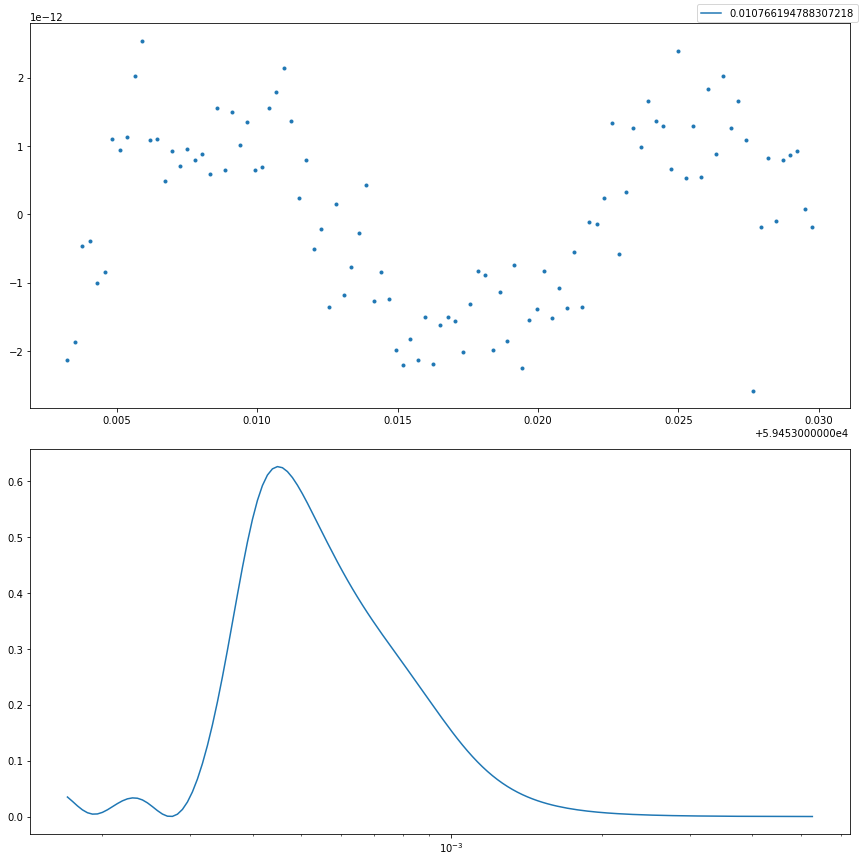

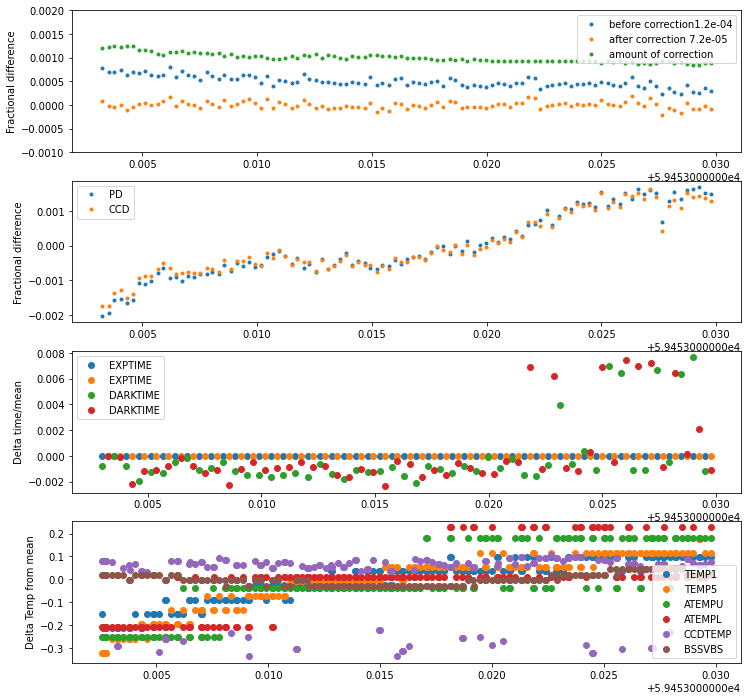

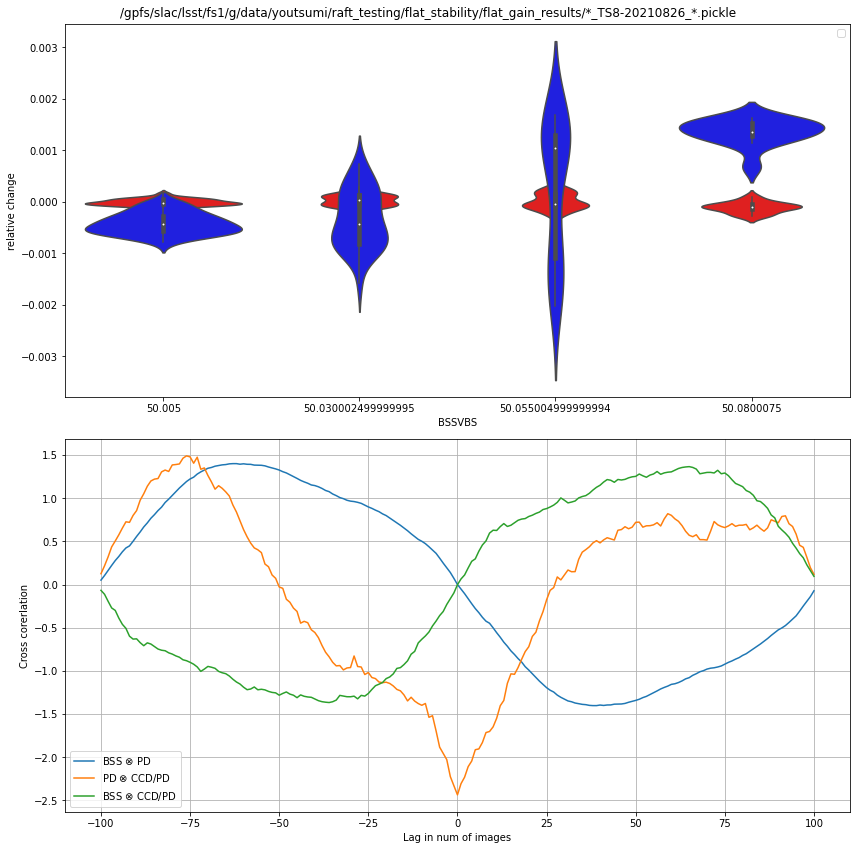

In [50]:
colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210826_*.pickle",skip=1,
         fitspathpattern="/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210826/TS_C_*/TS_C_*_R22_S11.fits")

ValueError: {'MJD-OBS'} is not a subset of table columns

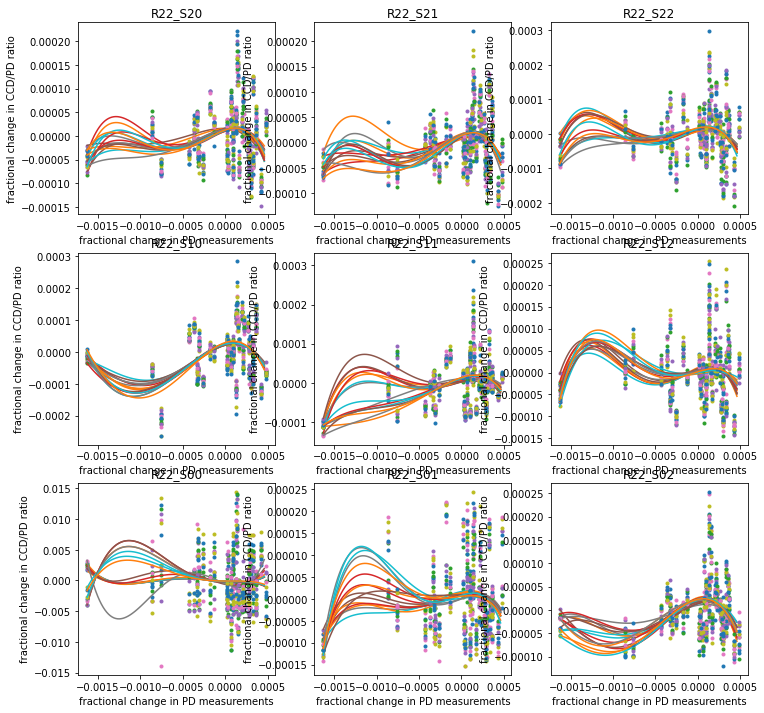

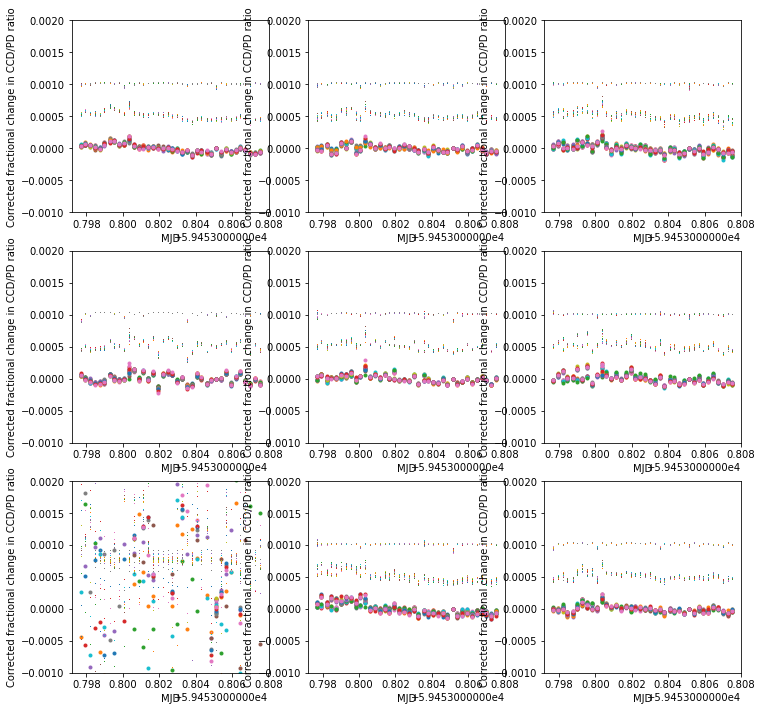

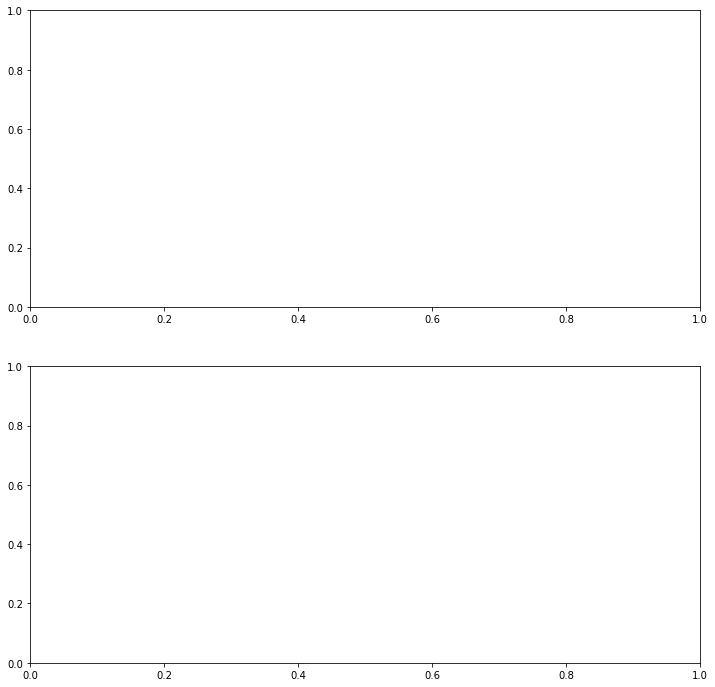

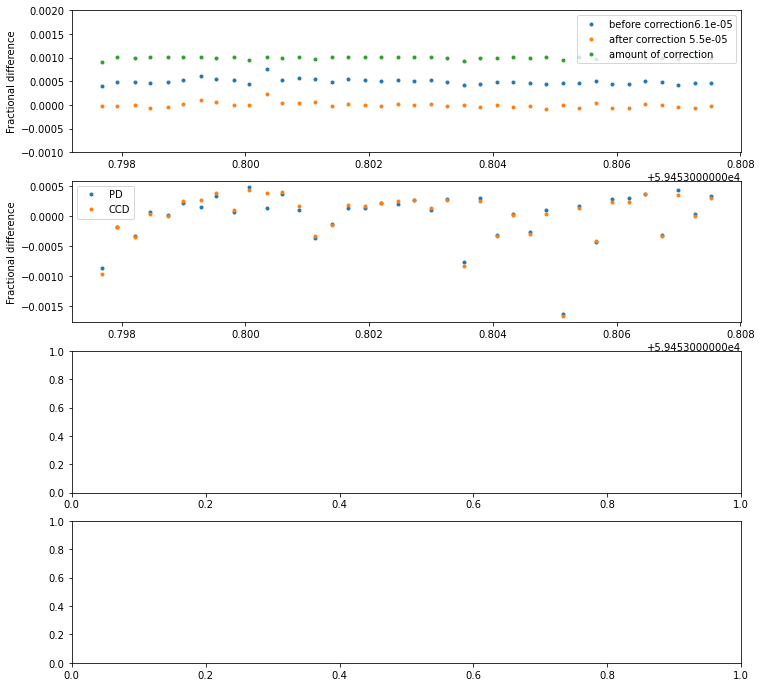

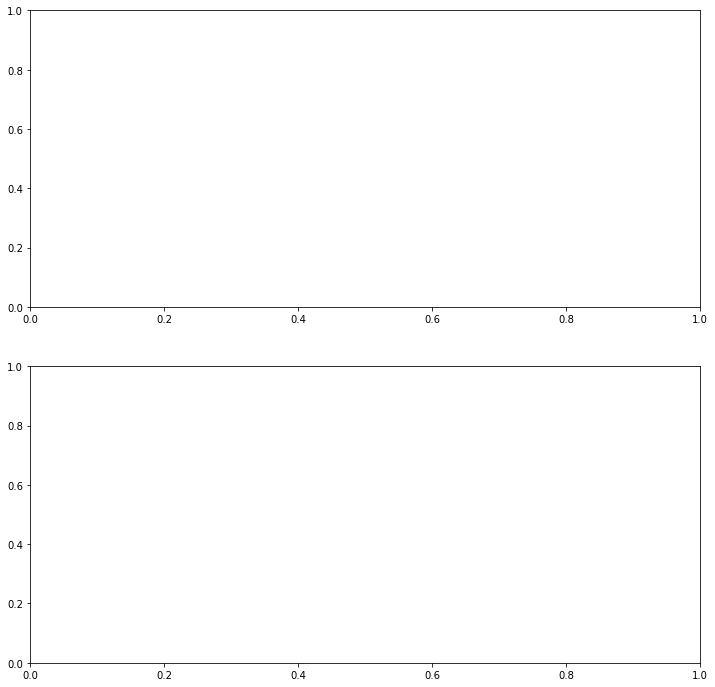

In [38]:
colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210827_*.pickle",skip=2,
         fitspathpattern="/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210827/TS_C_*/TS_C_*_R22_S11.fits")

No handles with labels found to put in legend.


101 101 -101
48
0.07980368053540587


<ipython-input-51-56fae9df76ff>:1: RankWarning: Polyfit may be poorly conditioned
  colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210827flat100#6distant_*.pickle",skip=1,


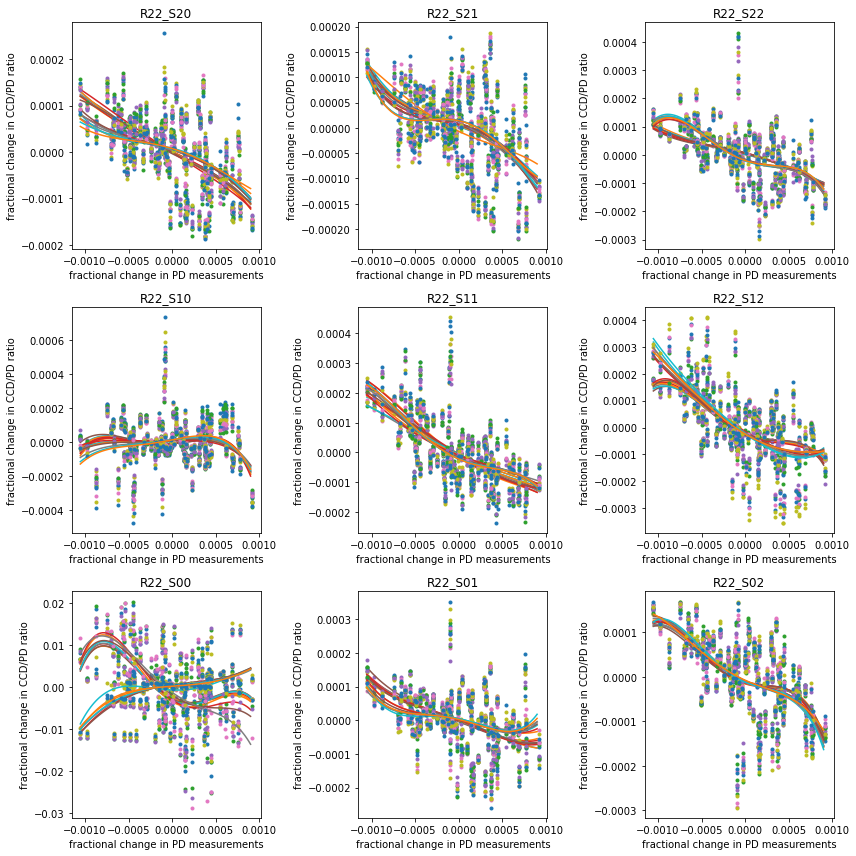

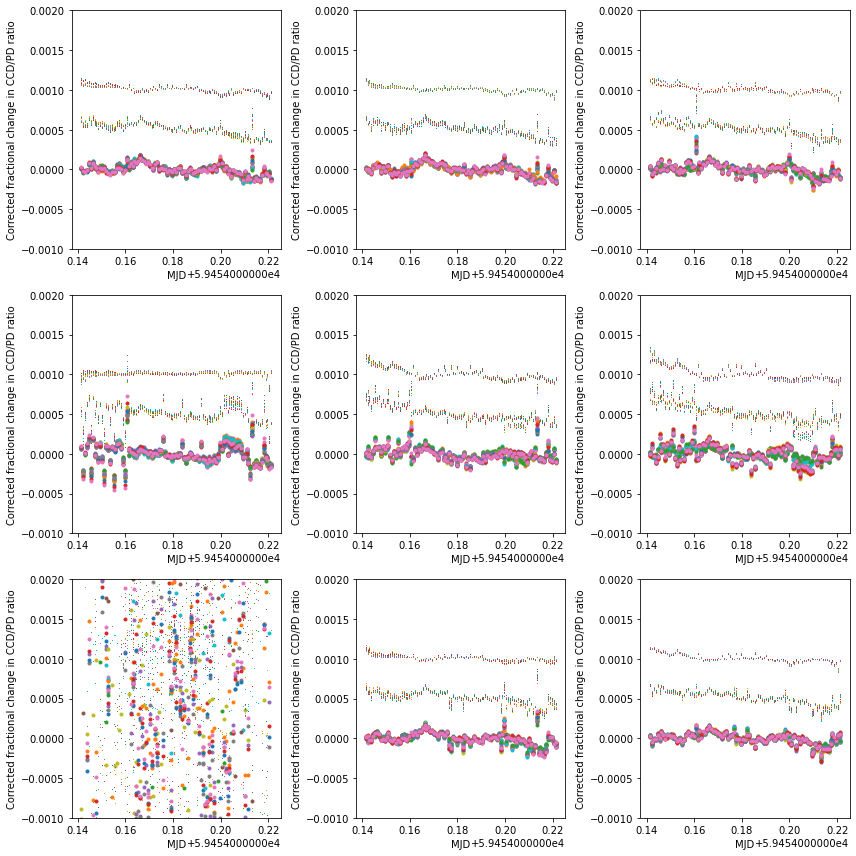

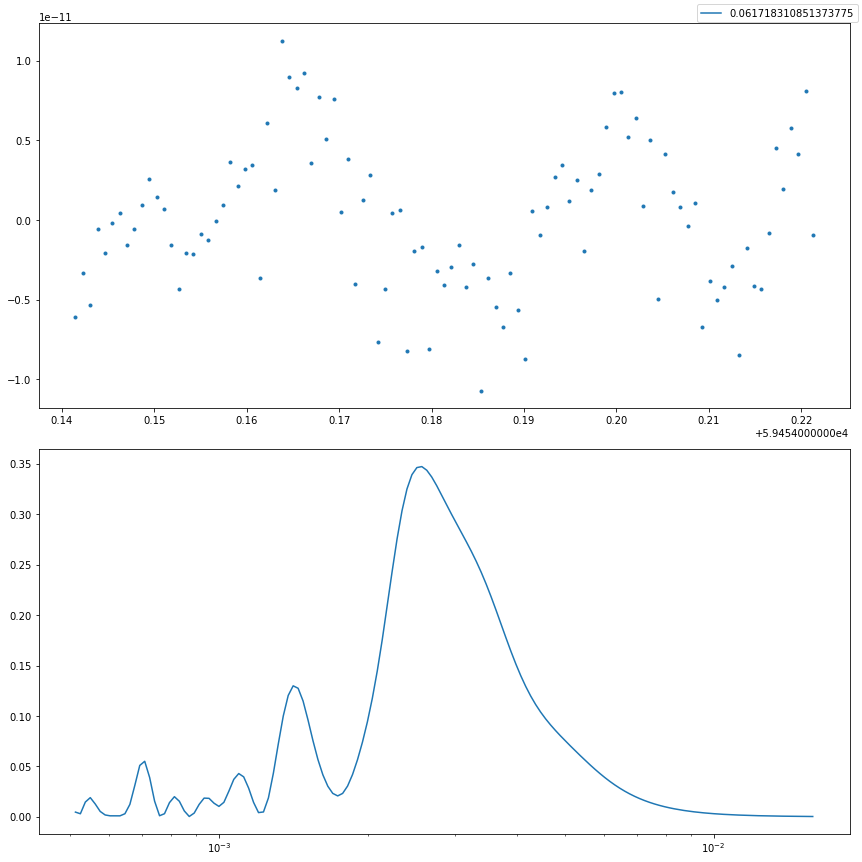

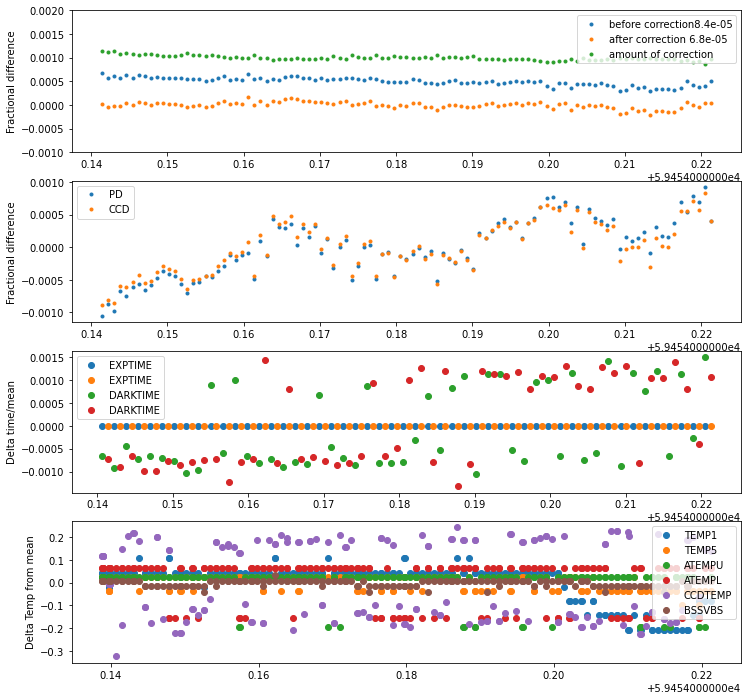

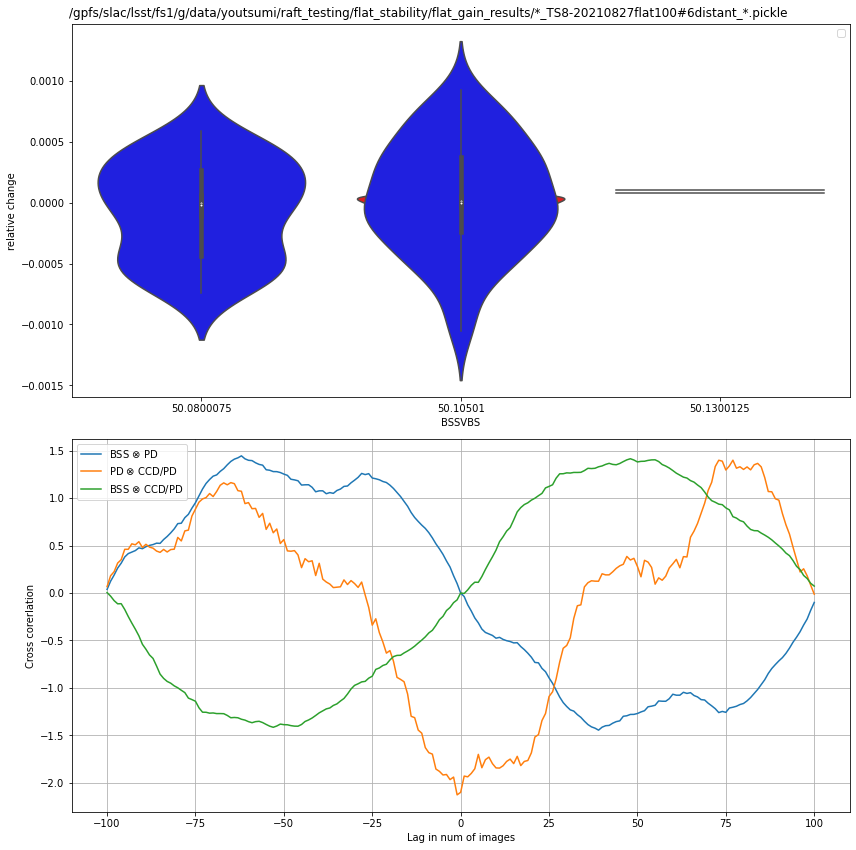

In [51]:
colorflux("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210827flat100#6distant_*.pickle",skip=1,
         fitspathpattern="/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210827flat100#6distant/TS_C_*/TS_C_*_R22_S11.fits")

In [126]:
main("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/*_TS8-20210731long_*.pickle")

NameError: name 'main' is not defined

In [250]:
from astropy.table import hstack
from astropy.stats import mad_std

fitspathpattern = "/gpfs/slac/lsst/fs3/g/data/R_and_D/ts8/20210731long/TS_C_*/TS_C_*_R22_S11.fits"

fitsfiles = glob.glob(fitspathpattern)[::]
additionaldata = Table([
    {
        key: fits.open(afitsfile)[aplane].header[key]
        for aplane, key in [
                (0,"MJD-OBS"),
                (-2, "TEMP1"),
                (-2, "TEMP5"),
                (-2, "ATEMPU"),
                (-2, "ATEMPL"),
                (-2, "CCDTEMP"),
                (0, "EXPTIME"),
                (0, "DARKTIME"),            
        ]
    }
    for afitsfile in fitsfiles
])

extra = Table([
    {
        "ch{:02d}".format(i) : numpy.std(fits.open(afitsfile)[i].data[:,520:])
        for i in range(1,17)
    }
    for afitsfile in fitsfiles
])

additionaldata = hstack( [ additionaldata, extra ] )


In [251]:
additionaldata[ additionaldata["EXPTIME"]>60 ]

<Table length=1020>
     MJD-OBS        TEMP1   TEMP5   ...        ch15               ch16       
     float64       float64 float64  ...      float64            float64      
------------------ ------- -------- ... ------------------ ------------------
59426.961560717784 -3.3125 -10.6875 ... 5.5157310370393935  5.590233835760325
 59426.73494216427 -3.3125   -10.75 ...  5.554535820927598  5.597961933862814
  59427.0740978471   -3.25 -10.6875 ...  5.556468394153683  5.608508686477156
 59427.09008003492   -3.25   -10.75 ...  5.555029719123145 5.6148403382914704
 59427.17321817111 -3.3125   -10.75 ...   5.55138389836367  5.608243229612922
59426.933633992914 -3.3125   -10.75 ...  5.526555046154697  5.619277899928799
59427.278702893294 -3.3125   -10.75 ... 5.5241580433952855 5.6212652610044955
 59427.21401063679 -3.3125 -10.6875 ...  5.511091292119019  5.584386547416177
59427.474573194515 -3.3125   -10.75 ...  5.539882891064814  5.617861829801283
59426.734129155055 -3.3125   -10.75 ...  5.507877576720722 5.6157086185006735
               ...     ...      ... ...                ...                ...
  59427.4266115739   -3.25 -10.6875 ...  5.511093296436733  5.582706819048686
59427.508929745294 -3.3125   -10.75 ...  5.518326113656797  5.615494555066995
 59427.35066524288 -3.3125   -10.75 ...  5.549230780433633  5.612482976456063
 59427.50335503463 -3.3125   -10.75 ... 5.5410485457275325  5.603148672842435
59427.445796168875 -3.3125 -10.6875 ...  5.523796112288623  5.592548422234933
 59426.70380431693 -3.3125   -10.75 ... 5.5367887212290325  5.618282876213943
 59427.50413600681 -3.3125 -10.6875 ... 5.5364187809441825  5.591412672423241
59426.950393159874 -3.3125   -10.75 ...  5.524730163217916  5.592780248408543
 59426.99826401612 -3.3125   -10.75 ...  5.538947054381131  5.604543453862069
 59426.90170673607 -3.3125   -10.75 ...  5.542444382985518  5.633940530662105

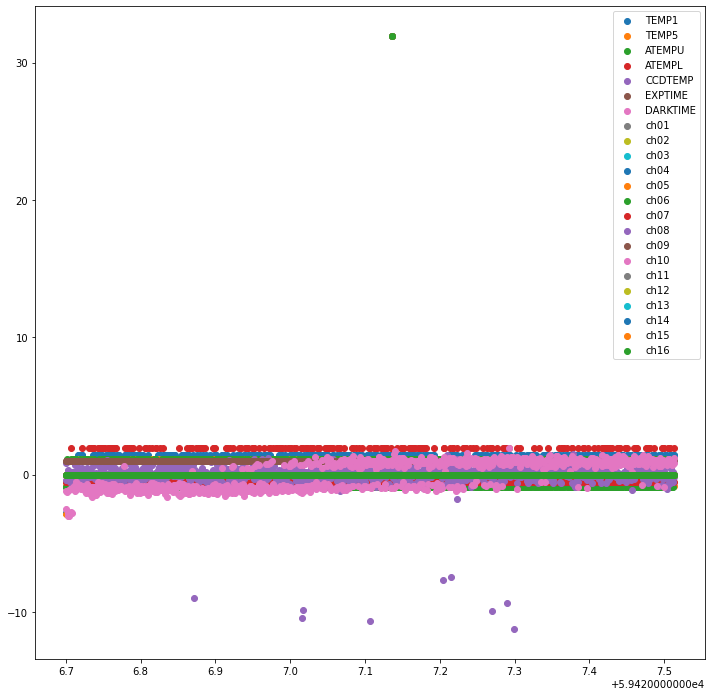

In [255]:
pylab.subplots(1, 1, figsize=(12,12),facecolor='w')

for colname in additionaldata.colnames:
    if colname == "MJD-OBS":
        continue
    mean = additionaldata[ additionaldata["EXPTIME"]>60 ][colname].mean()
    std = additionaldata[ additionaldata["EXPTIME"]>60 ][colname].std()
    pylab.scatter(additionaldata[ additionaldata["EXPTIME"]>60 ]["MJD-OBS"],
               (additionaldata[ additionaldata["EXPTIME"]>60 ][colname]-mean)/std,
               label=colname)
pylab.legend()

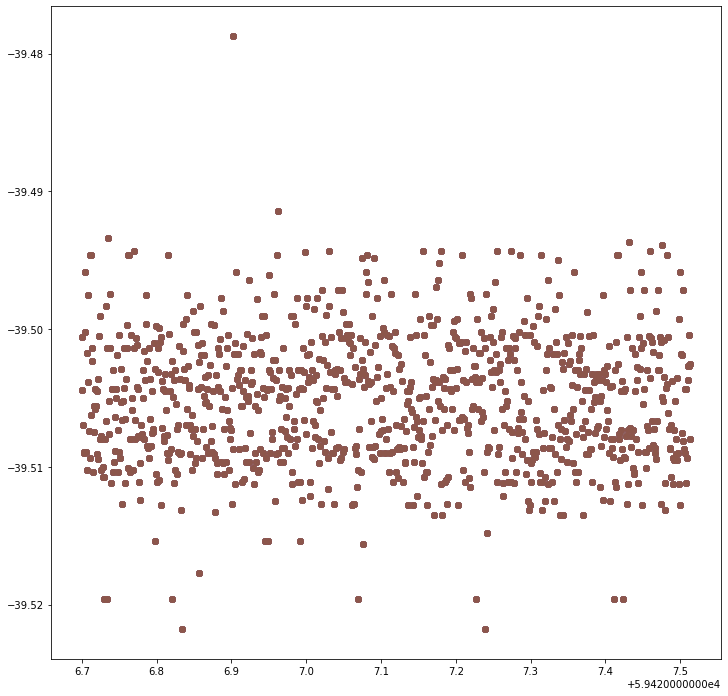

In [275]:
from scipy.signal import medfilt

pylab.subplots(1, 1, figsize=(12,12),facecolor='w')
for i in range(1,17):
    osr = additionaldata[ additionaldata["EXPTIME"]>60 ]["ch{:02d}".format(i)]
    mean = os.mean()
    pylab.scatter(additionaldata[ additionaldata["EXPTIME"]>60 ]["MJD-OBS"], medfilt(os-mean, 21))

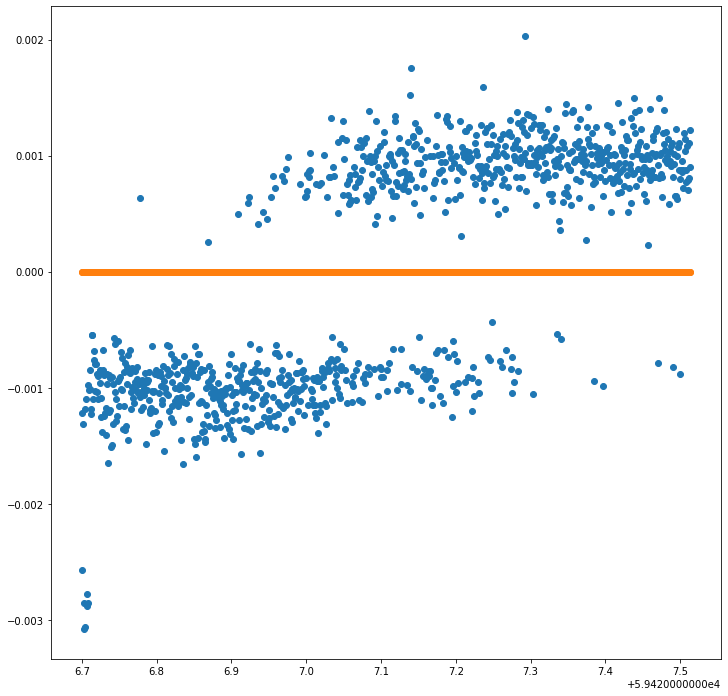

In [276]:
pylab.subplots(1, 1, figsize=(12,12),facecolor='w')

x = additionaldata[ additionaldata["EXPTIME"]>60 ]["MJD-OBS"]
darktime = additionaldata[ additionaldata["EXPTIME"]>60 ]["DARKTIME"]
exptime = additionaldata[ additionaldata["EXPTIME"]>60 ]["EXPTIME"]
pylab.scatter(x,(darktime-darktime.mean())/darktime.mean())
pylab.scatter(x,(exptime-exptime.mean())/exptime.mean())

In [5]:
tb=pandas.read_pickle("/gpfs/slac/lsst/fs1/g/data/youtsumi/raft_testing/flat_stability/flat_gain_results/R22_S10_TS8-20210528od25.3_flat_signal_sequence.pickle")
tb

mjd  seqnum      flux         amp01         amp02         amp03  \
0    59362.705443       6 -0.000001  54034.154297  54153.695312  53855.605469   
1    59362.706512       7 -0.000001  54105.660156  54224.937500  53926.871094   
2    59362.707662       9 -0.000001  54250.789062  54370.285156  54072.033203   
3    59362.708730      10 -0.000001  54242.777344  54361.578125  54063.505859   
4    59362.709879      12 -0.000001  54161.257812  54280.816406  53982.714844   
..            ...     ...       ...           ...           ...           ...   
97   59362.812963     151 -0.000001  54593.652344  54714.027344  54412.304688   
98   59362.814112     153 -0.000001  54477.375000  54597.320312  54297.777344   
99   59362.815180     154 -0.000001  54614.460938  54734.410156  54434.777344   
100  59362.816330     156 -0.000001  54452.058594  54574.800781  54276.937500   
101  59362.817397     157 -0.000001  54358.054688  54476.800781  54178.390625   

            amp04         amp05         amp06         amp07         amp08  \
0    53343.007812  53555.716797  53349.083984  53412.164062  54956.324219   
1    53415.359375  53627.433594  53418.195312  53481.441406  55028.722656   
2    53557.363281  53769.578125  53562.851562  53625.414062  55174.753906   
3    53548.648438  53761.230469  53553.488281  53617.535156  55165.585938   
4    53468.050781  53680.859375  53473.562500  53537.636719  55082.984375   
..            ...           ...           ...           ...           ...   
97   53895.460938  54108.531250  53899.554688  53964.621094  55521.617188   
98   53782.714844  53995.972656  53785.304688  53847.523438  55403.660156   
99   53917.300781  54131.203125  53920.693359  53983.289062  55543.941406   
100  53766.050781  53978.333984  53763.273438  53822.341797  55385.792969   
101  53664.136719  53876.792969  53668.312500  53729.480469  55282.734375   

            amp09         amp10         amp11         amp12         amp13  \
0    52155.236328  51394.769531  51388.792969  51339.632812  51252.349609   
1    52230.023438  51468.773438  51463.589844  51415.078125  51326.097656   
2    52363.050781  51600.595703  51593.376953  51545.630859  51457.187500   
3    52354.250000  51592.644531  51585.910156  51536.974609  51449.738281   
4    52276.660156  51514.476562  51508.312500  51460.603516  51372.134766   
..            ...           ...           ...           ...           ...   
97   52691.777344  51926.093750  51918.937500  51870.806641  51782.769531   
98   52587.306641  51821.292969  51816.433594  51767.910156  51678.117188   
99   52719.152344  51950.953125  51946.660156  51897.496094  51808.597656   
100  52556.882812  51784.951172  51787.714844  51743.296875  51652.253906   
101  52471.738281  51707.640625  51702.421875  51653.316406  51564.851562   

            amp14         amp15         amp16  
0    51328.027344  51596.984375  50823.351562  
1    51403.398438  51672.087891  50895.261719  
2    51533.527344  51803.238281  51025.919922  
3    51525.050781  51795.162109  51017.917969  
4    51449.015625  51717.511719  50940.675781  
..            ...           ...           ...  
97   51858.794922  52130.488281  51347.744141  
98   51755.578125  52027.386719  51246.562500  
99   51885.554688  52157.691406  51373.968750  
100  51724.660156  51991.167969  51206.224609  
101  51641.746094  51912.187500  51132.136719  

[102 rows x 19 columns]

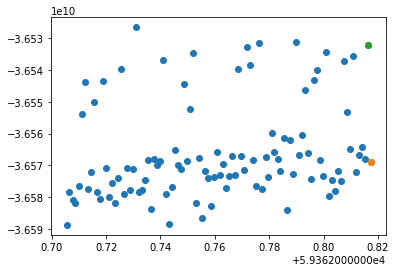

In [21]:
pylab.scatter(tb["mjd"], tb["amp16"]/tb["flux"])
x = tb["mjd"]
y = (tb["amp16"]/tb["flux"])
pylab.scatter(x[len(x)-1],y[len(x)-1])
pylab.scatter(x[len(x)-2],y[len(x)-2])